In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1347,Pocket Yoga,HEALTH_AND_FITNESS,4.4,2107,Varies with device,"100,000+",Paid,$2.99,Everyone,Health & Fitness,22-Dec-15,Varies with device,Varies with device
8426,Bike 3D Configurator,SPORTS,4.3,34062,85M,"1,000,000+",Free,0,Everyone,Sports,3-Apr-18,1.6.7,4.4 and up
1689,Hill Climb Racing,GAME,4.4,8923587,63M,"100,000,000+",Free,0,Everyone,Racing,2-Jul-18,1.37.2,4.2 and up
6389,Bk Bee Sales Manager,BUSINESS,NaN,0,2.1M,5+,Paid,$0.99,Everyone,Business,16-Dec-17,1,4.1 and up
5510,AQ Coach,SPORTS,NaN,0,28M,5+,Free,0,Everyone,Sports,25-May-18,1.1.0,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

#### 1. Which of the following column(s) has/have null values?

In [4]:
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

#### 2. Clean the `Rating` column and the other columns containing null values

In [5]:
df['Rating'].describe()

count    9367.000000
mean        4.231419
std         0.732847
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

<AxesSubplot:>

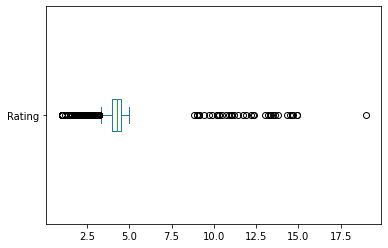

In [6]:
df['Rating'].plot(kind='box',vert=False)

In [7]:
df.loc[df['Rating']>5,'Rating'] = np.nan

In [8]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### 3. Clean the column `Reviews` and make it numeric

In [11]:
df['Reviews Numeric'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [12]:
df.loc[df['Reviews Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,2M,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,11-Jul-18,Varies with device,5.0 and up,NaN
1778,Block Craft 3D: Building Simulator Games For Free,GAME,4.5,1M,57M,"50,000,000+",Free,0,Everyone,Simulation,5-Mar-18,2.10.2,4.0.3 and up,NaN
1781,Trivia Crack,GAME,4.5,6.4M,95M,"100,000,000+",Free,0,Everyone,Trivia,3-Aug-18,2.79.0,4.1 and up,NaN


In [13]:
del df['Reviews Numeric']

In [14]:
df.loc[df['Reviews'].str.contains('M'),'Reviews'] = pd.to_numeric(
                                                        df.loc[df['Reviews'].str.contains('M'),'Reviews']
                                                        .str.replace('M',''))*1000000

In [15]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [16]:
print(df['Reviews'].dtype)

float64


#### 4. How many duplicated apps are there?

In [17]:
df['App'].duplicated(keep=False).sum()

1979

#### 5. Drop duplicated apps keeping the ones with the greatest number of reviews

In [18]:
df = df.sort_values(by=['App', 'Reviews'])
df.drop_duplicates(subset='App',keep='last',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.197727,27.0,3.6M,500+,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
324,#NAME?,COMICS,3.500000,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,TOOLS,4.500000,259.0,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.700000,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.197727,414.0,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.800000,718.0,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.600000,22098.0,18M,"1,000,000+",Free,0,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.000000,19.0,3.2M,"10,000+",Free,0,Everyone,Tools,21-Oct-17,1,4.2 and up


#### 6. Format the `Category` column

In [19]:
df['Category'] = df['Category'].str.replace('_',' ').str.capitalize()
df['Category'].unique()

array(['Sports', 'Comics', 'Social', 'Tools', 'Communication',
       'News and magazines', 'Health and fitness', 'Family',
       'Books and reference', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Game', 'Finance', 'Personalization', 'Photography',
       'Travel and local', 'Dating', 'Productivity', 'Art and design',
       'Food and drink', 'Video players', 'House and home',
       'Maps and navigation', 'Events', 'Education', 'Auto and vehicles',
       'Weather', 'Beauty', 'Entertainment', 'Libraries and demo',
       'Parenting'], dtype=object)

#### 7. Clean and convert the `Installs` column to numeric type

In [20]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace('+',''))
df['Installs']

C:\Users\Shrikaran\AppData\Local\Temp\ipykernel_15204\111790768.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace('+',''))


8884        500
324       10000
8532    1000000
4541      10000
4636      10000
         ...   
6334     100000
4362      10000
2575    1000000
7559      10000
882     1000000
Name: Installs, Length: 9648, dtype: int64

#### 8. Clean and convert the `Size` column to numeric (representing bytes)

In [21]:
df['Size'].sample(5)

2681     11M
9665    3.1M
4243     36M
5299    8.8M
9844     13M
Name: Size, dtype: object

In [22]:
df['Size'] = df['Size'].replace('Varies with device', "0").astype(str)

In [23]:
df.loc[df['Size'].str.contains('M'),'Size'] = (pd.to_numeric
                                        (df.loc[df['Size'].str.contains('M'),'Size']
                                         .str.replace('M',''))*(1024*1024)).astype(str)

In [24]:
df.loc[df['Size'].str.contains('k'),'Size'] = (pd.to_numeric
                                        (df.loc[df['Size'].str.contains('k'),'Size']
                                         .str.replace('k',''))*1024).astype(str)

In [25]:
df['Size'] = pd.to_numeric(df['Size'])
df['Size']

8884     3774873.6
324      9542041.6
8532    23068672.0
4541      207872.0
4636    55574528.0
           ...    
6334    61865984.0
4362    27262976.0
2575    18874368.0
7559     3355443.2
882      4194304.0
Name: Size, Length: 9648, dtype: float64

#### 9. Clean and convert the `Price` column to numeric

In [26]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('Free','0').str.replace('$',''))
df['Price']

C:\Users\Shrikaran\AppData\Local\Temp\ipykernel_15204\357261700.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('Free','0').str.replace('$',''))


8884      0.00
324       0.00
8532      0.00
4541      0.00
4636      0.00
         ...  
6334      0.00
4362    399.99
2575      0.00
7559      0.00
882       0.00
Name: Price, Length: 9648, dtype: float64

#### 10. App is Paid or free?

In [27]:
df['Distribution'] = 'Free'
df.loc[df['Price'] > 0,'Distribution'] = 'Paid'
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.197727,27.0,3774873.6,500,Free,0.00,Everyone,Sports,7-Oct-17,0.22,4.1 and up,Free
324,#NAME?,Comics,3.500000,115.0,9542041.6,10000,Free,0.00,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000,Free,0.00,Everyone,Social,2-Aug-18,5.03,4.1 and up,Free
4541,.R,Tools,4.500000,259.0,207872.0,10000,Free,0.00,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.700000,573.0,55574528.0,10000,Free,0.00,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.197727,414.0,61865984.0,100000,Free,0.00,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,Free
4362,💎 I'm rich,Lifestyle,3.800000,718.0,27262976.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,Paid
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098.0,18874368.0,1000000,Free,0.00,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,Free
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19.0,3355443.2,10000,Free,0.00,Everyone,Tools,21-Oct-17,1,4.2 and up,Free


## Analysis

#### 11. Which app has the most reviews?

In [28]:
df['Reviews'].max()

78158306.0

In [29]:
df.loc[df['Reviews'] == 78158306.0, 'App']

2544    Facebook
Name: App, dtype: object

#### 12. What category has the highest number of apps uploaded to the store?

In [30]:
df['Category'].value_counts().head()

Family      1874
Game         945
Tools        827
Business     420
Medical      395
Name: Category, dtype: int64

#### 13. To which category belongs the most expensive app?

In [31]:
df['Price'].max()

400.0

In [32]:
df.loc[df['Price'] == 400, 'Category']

4367    Lifestyle
Name: Category, dtype: object

#### 14. What's the name of the most expensive game?

In [33]:
df.loc[df['Category'] == 'Game',['App','Price']].sort_values('Price', ascending=False).head()

,App,Price
4203,The World Ends With You,17.99
10782,Trine 2: Complete Story,16.99
6341,Blackjack Verite Drills,14.00
1838,Star Wars ™: DIRTY,9.99
6198,Backgammon NJ for Android,7.99


#### 15. Which is the most popular Finance App?

In [34]:
df.loc[df['Category'] == 'Finance',['App','Installs']].sort_values('Installs',ascending=False).head()

,App,Installs
5601,Google Pay,100000000
1156,PayPal,50000000
1081,İşCep,10000000
1168,Wells Fargo Mobile,10000000
1169,Capital One® Mobile,10000000


#### 16. What *Teen* Game has the most reviews?

In [35]:
df.loc[(df['Category'] == 'Game') & (
    df['Content Rating'] == 'Teen'),['App','Reviews']].sort_values('Reviews',ascending=False).head()

,App,Reviews
3912,Asphalt 8: Airborne,8389714.0
5417,Mobile Legends: Bang Bang,8219586.0
1988,Hungry Shark Evolution,6074627.0
10327,Garena Free Fire,5534114.0
3967,Pixel Gun 3D: Survival shooter & Battle Royale,4487182.0


#### 17. Which is the free game with the most reviews?

In [42]:
df.loc[(df['Category'] == 'Game') & (
    df['Type'] == 'Free'),['App','Reviews']].sort_values('Reviews',ascending=False).head()

,App,Reviews
1879,Clash of Clans,44893888.0
1917,Subway Surfers,27725352.0
1878,Clash Royale,23136735.0
1966,Candy Crush Saga,22430188.0
1908,My Talking Tom,14892469.0


#### 18. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?

In [51]:
app = df.loc[df['Category']=='Lifestyle',['App','Size','Installs']].sort_values('Installs',ascending=False).iloc[0]
app

App             Tinder
Size        71303168.0
Installs     100000000
Name: 4587, dtype: object

In [52]:
(app['Installs']*app['Size'])/(1024*1024*1024*1024)

6484.9853515625